# Synchronous Generator dq 7th order

## Run C++ examples

In [27]:
%%bash
mkdir logs
TOP=${TOP:-$(git rev-parse --show-toplevel)}
${TOP}/build/Examples/Cxx/DP_EMT_SynGenDq7odODE_ThreePhFault

[09:47:36.196566 DP_SynGenDq7odODE_ThreePhFault_console info] Opening interfaces.
[09:47:36.196665 DP_SynGenDq7odODE_ThreePhFault_console info] Start simulation: DP_SynGenDq7odODE_ThreePhFault
0.10005: Handle event
0.20005: Handle event
[09:47:37.705506 DP_SynGenDq7odODE_ThreePhFault_console info] Simulation finished.
[09:47:37.770813 EMT_SynGenDq7odODE_ThreePhFault_console info] Opening interfaces.
[09:47:37.770864 EMT_SynGenDq7odODE_ThreePhFault_console info] Start simulation: EMT_SynGenDq7odODE_ThreePhFault
0.10005: Handle event
0.20005: Handle event
[09:47:39.341519 EMT_SynGenDq7odODE_ThreePhFault_console info] Simulation finished.


mkdir: cannot create directory ‘logs’: File exists


In [28]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
${TOP}/build/Examples/Cxx/DP_EMT_SynGenDq7odTrapez_ThreePhFault

[09:47:39.563550 DP_SynGenDq7odTrapez_ThreePhFault_console info] Opening interfaces.
[09:47:39.563609 DP_SynGenDq7odTrapez_ThreePhFault_console info] Start simulation: DP_SynGenDq7odTrapez_ThreePhFault
0.10005: Handle event
0.20005: Handle event
[09:47:40.572873 DP_SynGenDq7odTrapez_ThreePhFault_console info] Simulation finished.
[09:47:40.633229 EMT_SynGenDq7odTrapez_ThreePhFault_console info] Opening interfaces.
[09:47:40.633276 EMT_SynGenDq7odTrapez_ThreePhFault_console info] Start simulation: EMT_SynGenDq7odTrapez_ThreePhFault
0.10005: Handle event
0.20005: Handle event
[09:47:41.754258 EMT_SynGenDq7odTrapez_ThreePhFault_console info] Simulation finished.


## Three Phase Fault - DPsim ODE model

In [29]:
import villas.dataprocessing.readtools as rt
from villas.dataprocessing.timeseries import TimeSeries as ts
import matplotlib.pyplot as plt

In [30]:
work_dir = 'logs/DP_SynGenDq7odODE_ThreePhFault/'
log_name = 'DP_SynGenDq7odODE_ThreePhFault'
print(work_dir + log_name + '.csv')
ts_dpsim_ode_tpf = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
ts_dpsim_ode_tpf_emt = ts.frequency_shift_list(ts_dpsim_ode_tpf, 60)

logs/DP_SynGenDq7odODE_ThreePhFault/DP_SynGenDq7odODE_ThreePhFault.csv
column number: 7
results length: 6001
real column names: ['wr_gen']
complex column names: ['i_gen_0', 'i_gen_1', 'i_gen_2', 'v1_0', 'v1_1', 'v1_2']


In [31]:
ts_dpsim_ode_tpf_phasors = ts.phasors(ts_dpsim_ode_tpf)
for node, phasor in ts_dpsim_ode_tpf_phasors.items():
    print(node + ': ' + str(phasor['abs'].values[0]) + '<' + str(phasor['phase'].values[0]))

i_gen_0: 10206.207257<90.0
i_gen_1: 10206.207257378957<-30.00000000201289
i_gen_2: 10206.207256878957<-150.00000000284882
v1_0: 19595.88031<-90.00000000292387
v1_1: 19595.88030915192<149.99999999856834
v1_2: 19595.880309517946<29.999999997437566
wr_gen: 1.0<0.0


In [32]:
work_dir = 'logs/EMT_SynGenDq7odODE_ThreePhFault/'
log_name = 'EMT_SynGenDq7odODE_ThreePhFault'
print(work_dir + log_name + '.csv')
ts_dpsim_emt_ode_tpf = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

logs/EMT_SynGenDq7odODE_ThreePhFault/EMT_SynGenDq7odODE_ThreePhFault.csv
column number: 7
results length: 6001
real column names: ['i_gen_0', 'i_gen_1', 'i_gen_2', 'v1_0', 'v1_1', 'v1_2', 'wr_gen']
complex column names: []


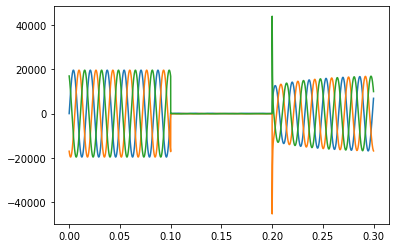

In [33]:
plt.plot(ts_dpsim_ode_tpf_emt['v1_0_shift'].time, ts_dpsim_ode_tpf_emt['v1_0_shift'].values)
plt.plot(ts_dpsim_ode_tpf_emt['v1_1_shift'].time, ts_dpsim_ode_tpf_emt['v1_1_shift'].values)
plt.plot(ts_dpsim_ode_tpf_emt['v1_2_shift'].time, ts_dpsim_ode_tpf_emt['v1_2_shift'].values)

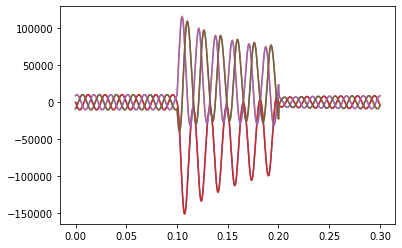

In [34]:
plt.plot(ts_dpsim_ode_tpf_emt['i_gen_0_shift'].time, ts_dpsim_ode_tpf_emt['i_gen_0_shift'].values)
plt.plot(ts_dpsim_ode_tpf_emt['i_gen_1_shift'].time, ts_dpsim_ode_tpf_emt['i_gen_1_shift'].values)
plt.plot(ts_dpsim_ode_tpf_emt['i_gen_2_shift'].time, ts_dpsim_ode_tpf_emt['i_gen_2_shift'].values)
plt.plot(ts_dpsim_emt_ode_tpf['i_gen_0'].time, ts_dpsim_emt_ode_tpf['i_gen_0'].values)
plt.plot(ts_dpsim_emt_ode_tpf['i_gen_1'].time, ts_dpsim_emt_ode_tpf['i_gen_1'].values)
plt.plot(ts_dpsim_emt_ode_tpf['i_gen_2'].time, ts_dpsim_emt_ode_tpf['i_gen_2'].values)

## Three Phase Fault - DPsim Trapez

In [35]:
work_dir = 'logs/DP_SynGenDq7odTrapez_ThreePhFault/'
log_name = 'DP_SynGenDq7odTrapez_ThreePhFault'
print(work_dir + log_name + '.csv')
ts_dpsim_trapez_tpf = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')
ts_dpsim_trapez_tpf_emt = ts.frequency_shift_list(ts_dpsim_trapez_tpf, 60)

logs/DP_SynGenDq7odTrapez_ThreePhFault/DP_SynGenDq7odTrapez_ThreePhFault.csv
column number: 7
results length: 6001
real column names: ['wr_gen']
complex column names: ['i_gen_0', 'i_gen_1', 'i_gen_2', 'v1_0', 'v1_1', 'v1_2']


In [36]:
work_dir = 'logs/EMT_SynGenDq7odTrapez_ThreePhFault/'
log_name = 'EMT_SynGenDq7odTrapez_ThreePhFault'
print(work_dir + log_name + '.csv')
ts_dpsim_emt_trapez_tpf = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

logs/EMT_SynGenDq7odTrapez_ThreePhFault/EMT_SynGenDq7odTrapez_ThreePhFault.csv
column number: 7
results length: 6001
real column names: ['i_gen_0', 'i_gen_1', 'i_gen_2', 'v1_0', 'v1_1', 'v1_2', 'wr_gen']
complex column names: []


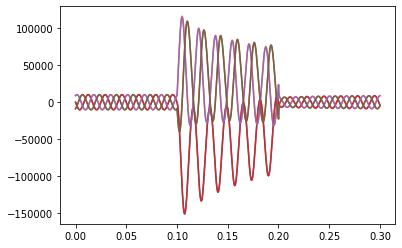

In [37]:
plt.plot(ts_dpsim_trapez_tpf_emt['i_gen_0_shift'].time, ts_dpsim_trapez_tpf_emt['i_gen_0_shift'].values)
plt.plot(ts_dpsim_trapez_tpf_emt['i_gen_1_shift'].time, ts_dpsim_trapez_tpf_emt['i_gen_1_shift'].values)
plt.plot(ts_dpsim_trapez_tpf_emt['i_gen_2_shift'].time, ts_dpsim_trapez_tpf_emt['i_gen_2_shift'].values)
plt.plot(ts_dpsim_emt_trapez_tpf['i_gen_0'].time, ts_dpsim_emt_trapez_tpf['i_gen_0'].values)
plt.plot(ts_dpsim_emt_trapez_tpf['i_gen_1'].time, ts_dpsim_emt_trapez_tpf['i_gen_1'].values)
plt.plot(ts_dpsim_emt_trapez_tpf['i_gen_2'].time, ts_dpsim_emt_trapez_tpf['i_gen_2'].values)

## Three Phase Fault - Simulink

In [38]:
# download Simulink log file from RWTH gitlab
import os
import urllib.request

if not os.path.exists('reference-results'):
    os.mkdir('reference-results')

url = 'https://git.rwth-aachen.de/acs/public/simulation/reference-results/raw/master/Simulink/SynchronousGenerator/SynGen_dq_7th_ThreePhFault/SL_SynGenDq7od_ThreePhFault_v_i.csv'
local_file = 'reference-results/SL_SynGenDq7od_ThreePhFault_v_i.csv'
urllib.request.urlretrieve(url, local_file) 

import villas.dataprocessing.readtools as rt
import matplotlib.pyplot as plt 
ts_sl_tpf = rt.read_timeseries_simulink(local_file)

column number: 6
results length: 6001
real column names: ['v1', 'v2', 'v3', 'i1', 'i2', 'i3']
complex column names: []


(0, 0.3)

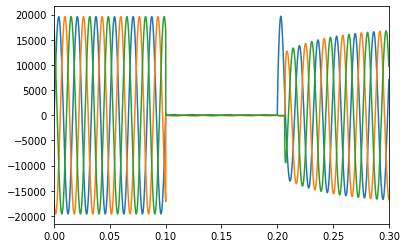

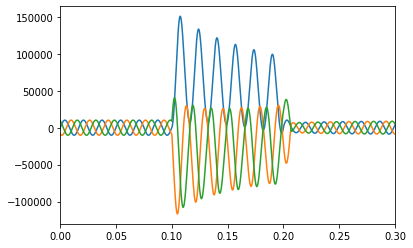

In [39]:
plt.plot(ts_sl_tpf['v1'].time, ts_sl_tpf['v1'].values)
plt.plot(ts_sl_tpf['v2'].time, ts_sl_tpf['v2'].values)
plt.plot(ts_sl_tpf['v3'].time, ts_sl_tpf['v3'].values)
plt.xlim(0,0.3)

plt.figure()
plt.plot(ts_sl_tpf['i1'].time, ts_sl_tpf['i1'].values)
plt.plot(ts_sl_tpf['i2'].time, ts_sl_tpf['i2'].values)
plt.plot(ts_sl_tpf['i3'].time, ts_sl_tpf['i3'].values)
plt.xlim(0,0.3)

## DPsim ODE and Simulink

(0.05, 0.25)

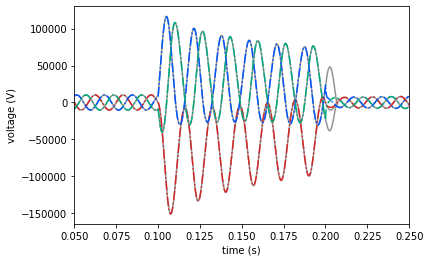

In [40]:
#%matplotlib qt
import matplotlib.pyplot as plt
ts_sl_tpf_i1 = ts('i1', ts_sl_tpf['i1'].time, -ts_sl_tpf['i1'].values)
ts_sl_tpf_i2 = ts('i2', ts_sl_tpf['i2'].time, -ts_sl_tpf['i2'].values)
ts_sl_tpf_i3 = ts('i3', ts_sl_tpf['i3'].time, -ts_sl_tpf['i3'].values)

#plt.figure(figsize=(20,10))
plt.plot(ts_sl_tpf_i1.time, ts_sl_tpf_i1.values, color = '#939393ff', label = 'ia_sl')
plt.plot(ts_sl_tpf_i2.time, ts_sl_tpf_i2.values, color = '#939393ff', label = 'ib_sl')
plt.plot(ts_sl_tpf_i3.time, ts_sl_tpf_i3.values, color = '#939393ff', label = 'ic_sl')
plt.plot(ts_dpsim_ode_tpf_emt['i_gen_0_shift'].time, ts_dpsim_ode_tpf_emt['i_gen_0_shift'].values, linestyle='-.', color = '#d62728ff', label = 'ia_dpsim')
plt.plot(ts_dpsim_ode_tpf_emt['i_gen_1_shift'].time, ts_dpsim_ode_tpf_emt['i_gen_1_shift'].values, linestyle='-.', color = '#0055ffff', label = 'ib_dpsim')
plt.plot(ts_dpsim_ode_tpf_emt['i_gen_2_shift'].time, ts_dpsim_ode_tpf_emt['i_gen_2_shift'].values, linestyle='-.', color = '#00aa7fff', label = 'ic_dpsim')
plt.xlabel('time (s)')
plt.ylabel('voltage (V)')
plt.xlim(0.05,0.25)
#plt.ylim(-1.6e5,1.6e5)
#plt.savefig('syngen_fault_ode.pdf')

(0.09, 0.21)

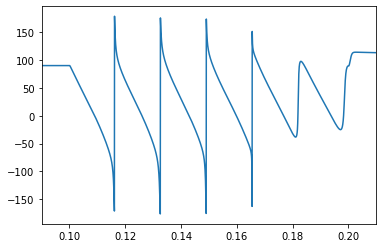

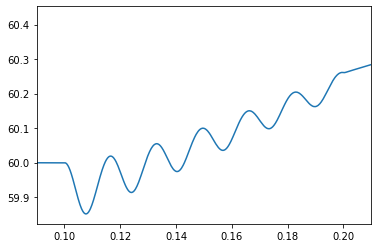

In [41]:
plt.plot(ts_dpsim_ode_tpf_phasors['i_gen_0']['phase'].time, ts_dpsim_ode_tpf_phasors['i_gen_0']['phase'].values)
plt.xlim([0.09,0.21])

plt.figure()
plt.plot(ts_dpsim_ode_tpf['wr_gen'].time, ts_dpsim_ode_tpf['wr_gen'].values * 60)
plt.xlim([0.09,0.21])

In [42]:
import numpy as np
diff = ts_sl_tpf_i1.values - ts_dpsim_ode_tpf_emt['i_gen_0_shift'].values
assert np.max(diff[:4000]) < 200

## DPsim Trapez and Simulink

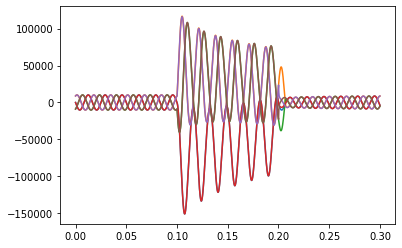

In [43]:
ts_sl_tpf_i1 = ts('i1', ts_sl_tpf['i1'].time, -ts_sl_tpf['i1'].values)
ts_sl_tpf_i2 = ts('i2', ts_sl_tpf['i2'].time, -ts_sl_tpf['i2'].values)
ts_sl_tpf_i3 = ts('i3', ts_sl_tpf['i3'].time, -ts_sl_tpf['i3'].values)

#plt.figure(figsize=(20,10))
plt.plot(ts_sl_tpf_i1.time, ts_sl_tpf_i1.values)
plt.plot(ts_sl_tpf_i2.time, ts_sl_tpf_i2.values)
plt.plot(ts_sl_tpf_i3.time, ts_sl_tpf_i3.values)
plt.plot(ts_dpsim_trapez_tpf_emt['i_gen_0_shift'].time, ts_dpsim_trapez_tpf_emt['i_gen_0_shift'].values)
plt.plot(ts_dpsim_trapez_tpf_emt['i_gen_1_shift'].time, ts_dpsim_trapez_tpf_emt['i_gen_1_shift'].values)
plt.plot(ts_dpsim_trapez_tpf_emt['i_gen_2_shift'].time, ts_dpsim_trapez_tpf_emt['i_gen_2_shift'].values)

In [44]:
import numpy as np
diff = ts_sl_tpf_i1.values - ts_dpsim_trapez_tpf_emt['i_gen_0_shift'].values
assert np.max(diff[:4000]) < 200